<a href="https://colab.research.google.com/github/NP-15/Deep-Learning/blob/main/Lab-02%3A%20Digit%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Class exercise

In [32]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
# Normalize the pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

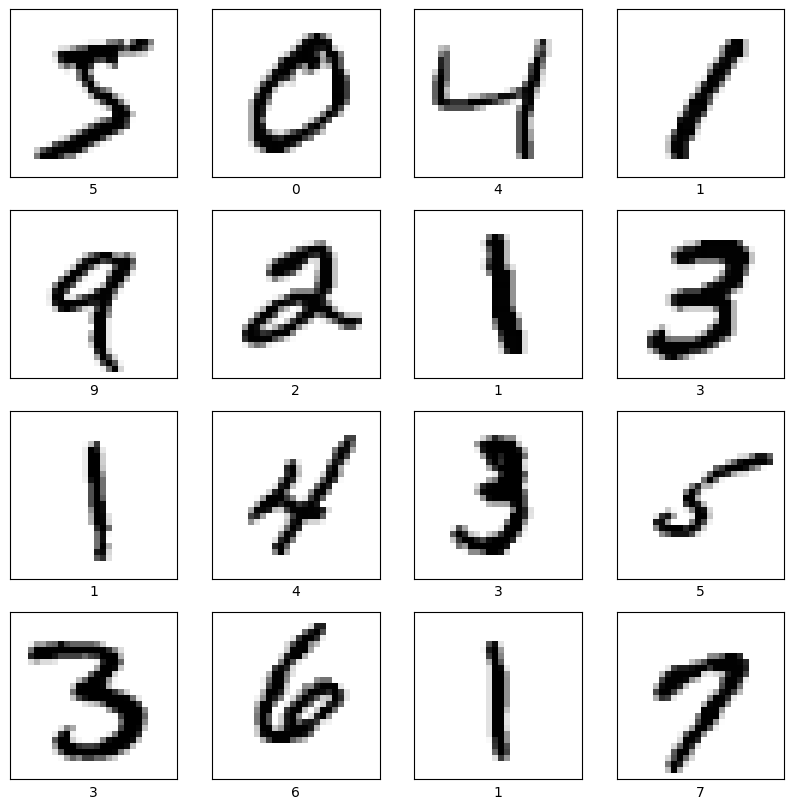

In [34]:
# Display the first few images
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [35]:
# Building the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Flatten the input
    layers.Dense(128, activation='relu'), # First dense layer
    layers.Dropout(0.2), # Dropout for regularization
    layers.Dense(10, activation='softmax') # Output layer
])

# Display the model's architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2903 - accuracy: 0.9151 - val_loss: 0.1398 - val_accuracy: 0.9586
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1429 - accuracy: 0.9574 - val_loss: 0.1121 - val_accuracy: 0.9655
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1079 - accuracy: 0.9671 - val_loss: 0.0845 - val_accuracy: 0.9730
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0867 - accuracy: 0.9732 - val_loss: 0.0791 - val_accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0752 - accuracy: 0.9758 - val_loss: 0.0709 - val_accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0662 - accuracy: 0.9789 - val_loss: 0.0706 - val_accuracy: 0.9783
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0573 - accuracy: 0.9810 - val_loss: 0.0691 - val_accuracy:

313/313 - 1s - loss: 0.0673 - accuracy: 0.9803 - 783ms/epoch - 3ms/step

Test accuracy: 0.9803000092506409


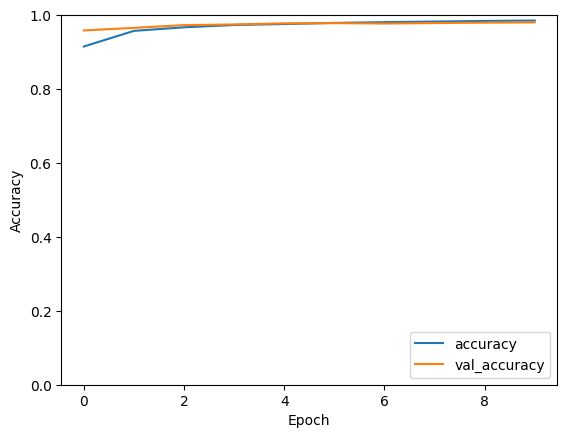

In [37]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 1s 2ms/step


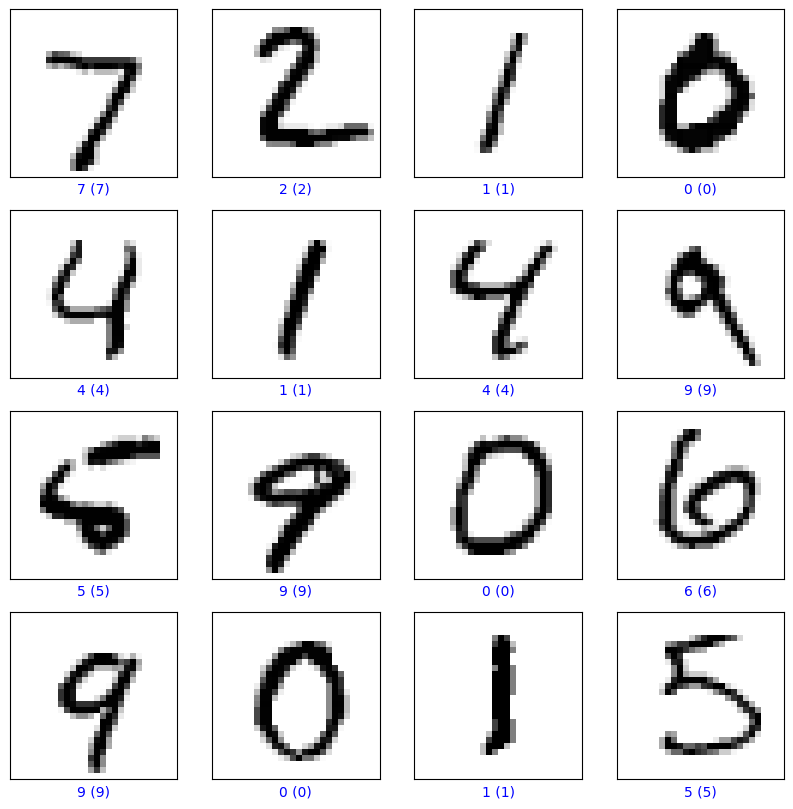

In [38]:
# Make predictions
predictions = model.predict(X_test)

# Plot some predictions with their true labels
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f'{predicted_label} ({true_label})', color=color)
plt.show()

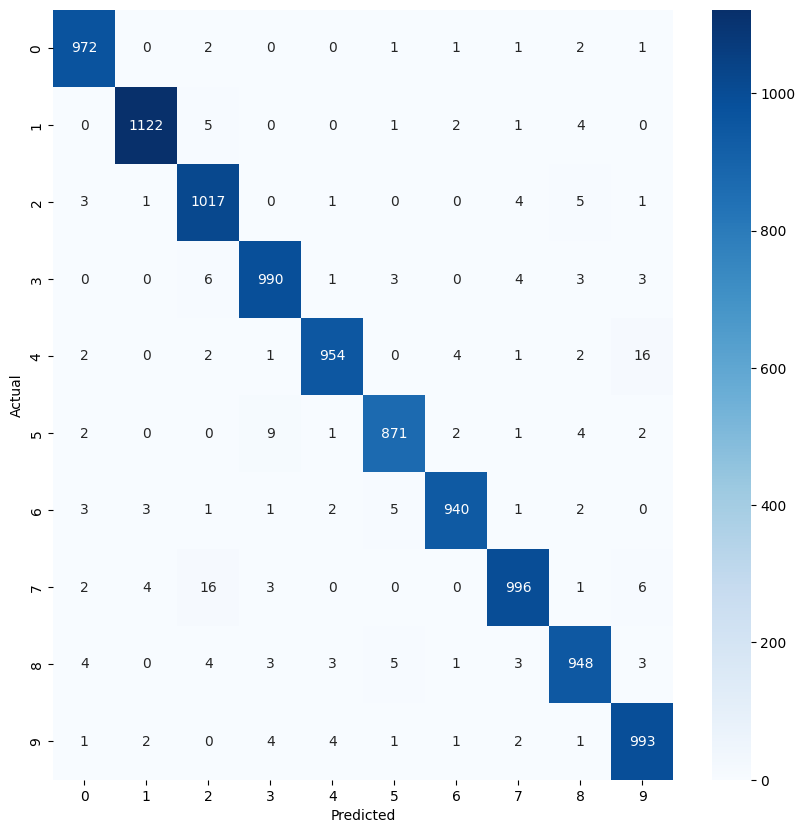

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10),
yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Exercise 1: Increasing number of neurons

In [40]:
# Building the model
model2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Flatten the input
    layers.Dense(256, activation='relu'), # First dense layer
    layers.Dropout(0.2), # Dropout for regularization
    layers.Dense(20, activation='softmax') # Output layer
])

# Display the model's architecture
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 20)                5140      
                                                                 
Total params: 206100 (805.08 KB)
Trainable params: 206100 (805.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history2 = model2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2624 - accuracy: 0.9239 - val_loss: 0.1194 - val_accuracy: 0.9636
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1186 - accuracy: 0.9648 - val_loss: 0.0838 - val_accuracy: 0.9750
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0855 - accuracy: 0.9736 - val_loss: 0.0765 - val_accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0670 - accuracy: 0.9789 - val_loss: 0.0683 - val_accuracy: 0.9792
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0546 - accuracy: 0.9825 - val_loss: 0.0635 - val_accuracy: 0.9808
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0472 - accuracy: 0.9848 - val_loss: 0.0650 - val_accuracy: 0.9801
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0392 - accuracy: 0.9874 - val_loss: 0.0670 - val_acc

313/313 - 1s - loss: 0.0697 - accuracy: 0.9812 - 572ms/epoch - 2ms/step

Test accuracy: 0.9811999797821045


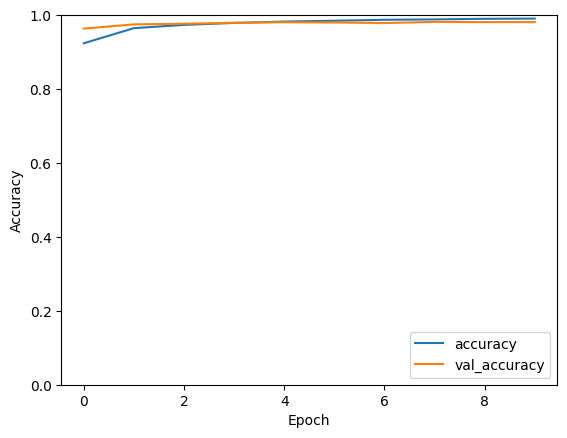

In [42]:
# Evaluate the model
test_loss, test_acc = model2.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot training and validation accuracy over epochs
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 1s 2ms/step


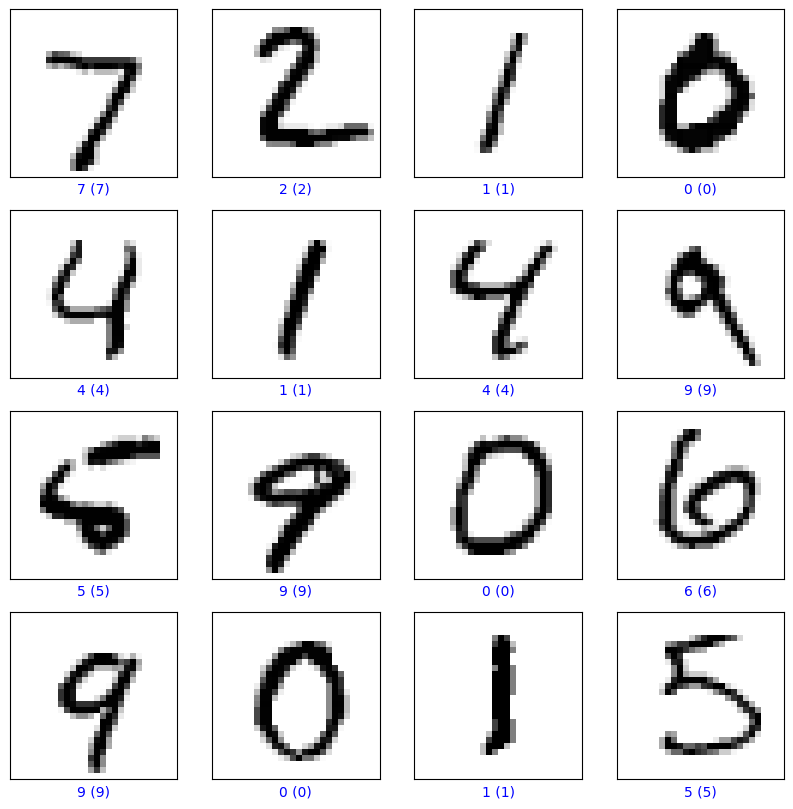

In [43]:
# Make predictions
predictions2 = model2.predict(X_test)

# Plot some predictions with their true labels
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f'{predicted_label} ({true_label})', color=color)
plt.show()


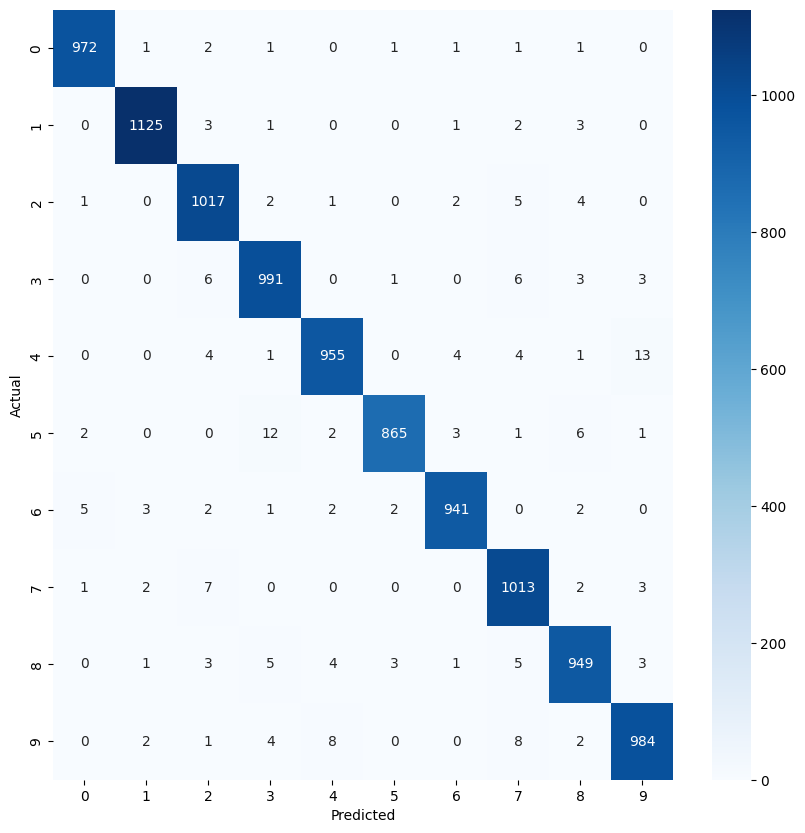

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
y_pred = np.argmax(predictions2, axis=1)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10),
yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Exercise 2: Adding more layers and also increasing dropout layers

In [45]:
from tensorflow.keras import models, layers

# Building the updated model with more layers
model1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the input
    layers.Dense(128, activation='relu'),   # First dense layer
    layers.Dropout(0.2),                    # Dropout for regularization
    layers.Dense(64, activation='relu'),    # Second dense layer
    layers.Dropout(0.2),                    # Dropout for regularization
    layers.Dense(64, activation='relu'),    # Third dense layer
    layers.Dropout(0.2),                    # Dropout for regularization
    layers.Dense(10, activation='softmax')   # Output layer
])

# Display the model's architecture
model1.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dropout_10 (Dropout)        (None, 64)               

In [46]:
# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history1 = model1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3816 - accuracy: 0.8854 - val_loss: 0.1466 - val_accuracy: 0.9564
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1888 - accuracy: 0.9464 - val_loss: 0.1100 - val_accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1472 - accuracy: 0.9578 - val_loss: 0.0896 - val_accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1280 - accuracy: 0.9629 - val_loss: 0.0873 - val_accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1087 - accuracy: 0.9686 - val_loss: 0.0822 - val_accuracy: 0.9760
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0984 - accuracy: 0.9708 - val_loss: 0.0806 - val_accuracy: 0.9772
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0900 - accuracy: 0.9729 - val_loss: 0.0839 - val_accu

313/313 - 1s - loss: 0.0825 - accuracy: 0.9781 - 515ms/epoch - 2ms/step

Test accuracy: 0.9781000018119812


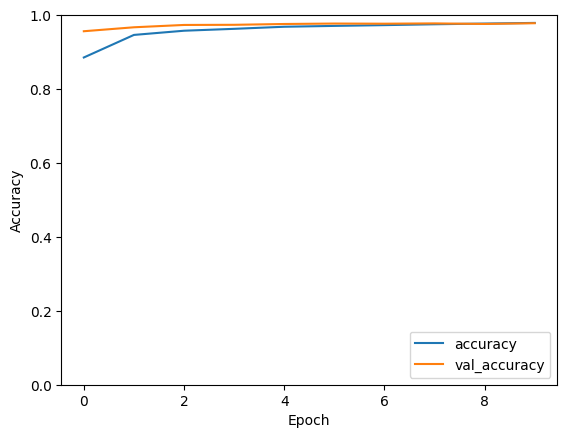

In [47]:
# Evaluate the model
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot training and validation accuracy over epochs
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 1s 2ms/step


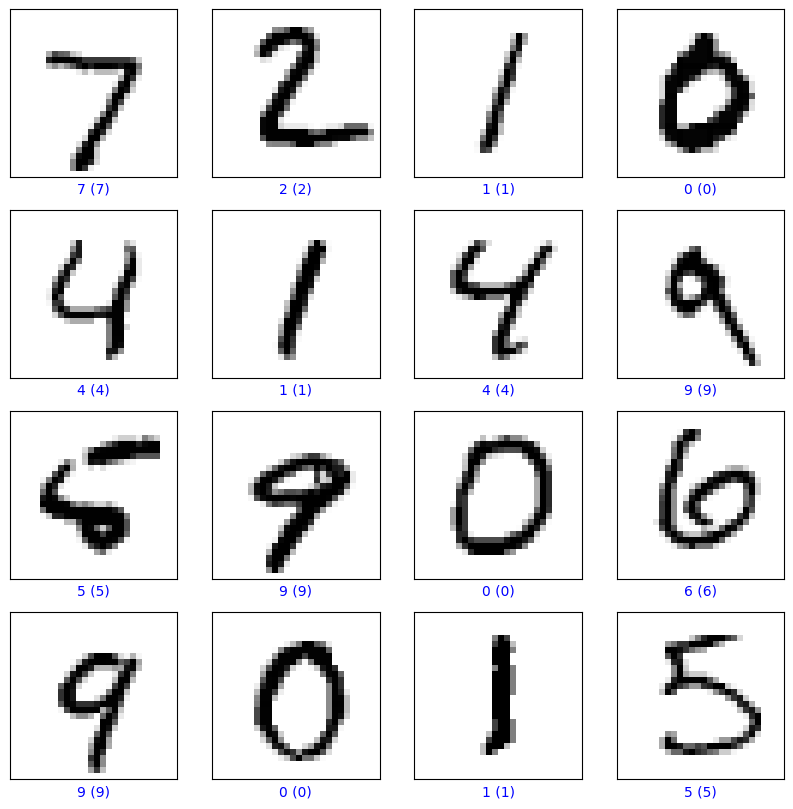

In [48]:
# Make predictions
predictions1 = model1.predict(X_test)

# Plot some predictions with their true labels
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions1[i])
    true_label = y_test[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f'{predicted_label} ({true_label})', color=color)
plt.show()

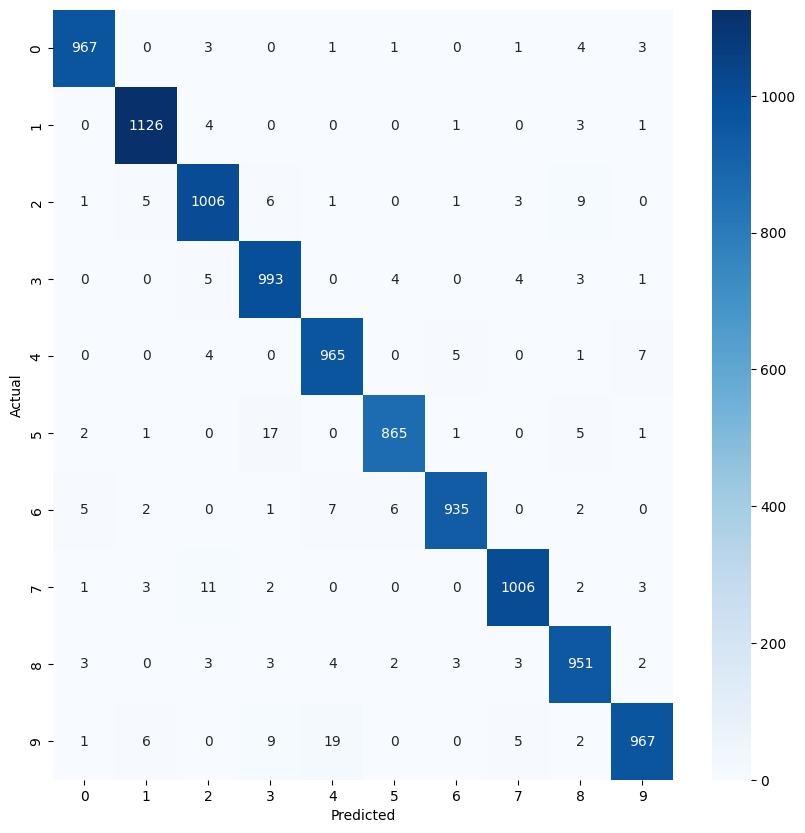

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
y_pred = np.argmax(predictions1, axis=1)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10),
yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()